<a href="https://colab.research.google.com/github/YusufAbdurrahmann/diabetes-classification/blob/main/diabetes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **Data Import**

In [3]:
df = pd.read_csv("sample_data/Diabetes-1.csv", index_col = 0)
df.head()

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Data Understanding**

In [4]:
print(df.shape)

(768, 9)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Kehamilan                 768 non-null    int64  
 1   Glukosa                   768 non-null    int64  
 2   Tekanan Darah             768 non-null    int64  
 3   Ketebalan Kulit           768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Umur                      768 non-null    int64  
 8   Hasil                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [6]:
df.describe()

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Data cleaning**

In [7]:
df.isnull().sum()

,0
Kehamilan,0
Glukosa,0
Tekanan Darah,0
Ketebalan Kulit,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Umur,0
Hasil,0


In [9]:
df.Hasil.value_counts()

,count
Hasil,
0,500
1,268


In [8]:
df.duplicated().sum()

0

# **Explanatory Data Analysis (EDA)**

<ipython-input-20-9ae7ae39049e>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = "Umur", data = df, kde= True, palette = "pastel")


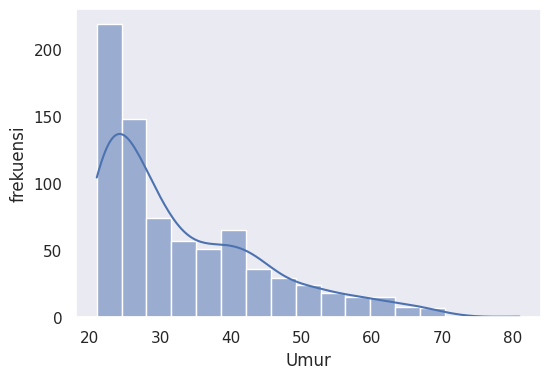

In [20]:
plt.figure(figsize=(6,4))
sns.set_theme(style = "dark")
sns.histplot(x = "Umur", data = df, kde= True, palette = "pastel")
plt.ylabel("frekuensi")
plt.xlabel("Umur")
plt.show()

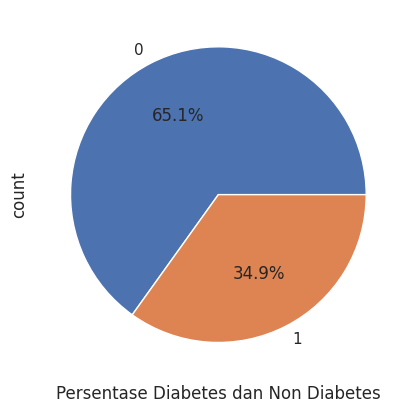

In [26]:
sns.set_theme(style = "dark")
df["Hasil"].value_counts().plot(kind = "pie", autopct="%1.1f%%")
plt.xlabel("Persentase Diabetes dan Non Diabetes")
plt.show()

In [27]:
df.corr()

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
Kehamilan,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glukosa,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Tekanan Darah,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Ketebalan Kulit,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Umur,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Hasil,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

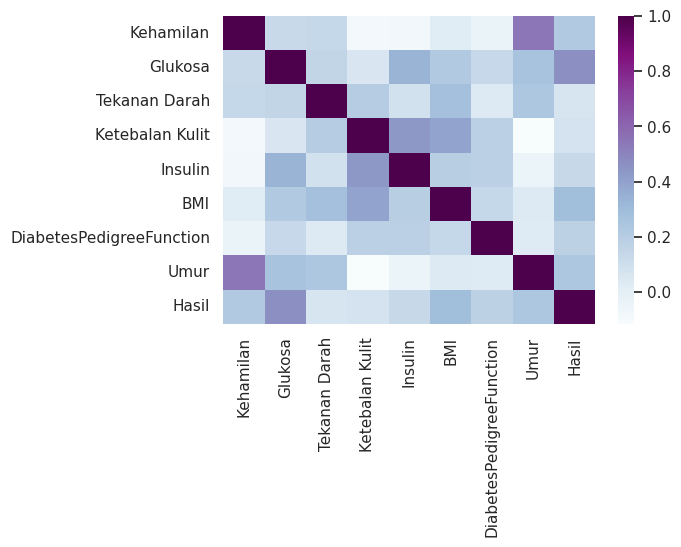

In [30]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap="BuPu")

# **Data Preperation**

In [38]:
X = df.drop(columns = ["Hasil"])
y = df["Hasil"]

In [39]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# **Modelling & Evaluation**

In [43]:
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print(classification_report(y_pred, y_test))
print(accuracy)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       100
           1       0.65      0.67      0.66        54

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

0.7597402597402597
